In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install perlin-noise
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install distributed
!{sys.executable} -m pip install multiprocess

In [1]:
# Define imports
from perlin_noise import PerlinNoise
from multiprocess import Pool
import matplotlib.pyplot as plt
import math
import numpy as np
import time

## Original Code (Luke Enzo)

In [2]:
def world(n):
    noise = (PerlinNoise(octaves=3, seed=1))
    noise2 = (PerlinNoise(octaves=6, seed=1))
    noise3 = (PerlinNoise(octaves=12, seed=1))
    noise4 = (PerlinNoise(octaves=24, seed=1))
    noise5 = (PerlinNoise(octaves=48, seed=1))
    noise6 = (PerlinNoise(octaves=96, seed=1))
    world = [[(noise([i/n, j/n])+\
               (0.5 * noise2([i/n, j/n]))+\
               (0.25 * noise3([i/n, j/n]))+\
               (0.125 * noise4([i/n, j/n]))+\
               (0.0625 * noise5([i/n, j/n]))+\
               (0.03125 * noise6([i/n, j/n])))\
              for j in range(n)]\
             for i in range(n)]
    return world
def main():
    start = time.time()
    p = Pool()
    nums = [128]
    output = p.map(world, nums)
    p.close()
    p.join()
    end = time.time()
    
    plt.imshow(output[0])
    plt.show()
    print("Time taken:", end - start)

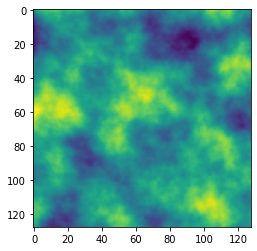

Time taken: 13.63347315788269


In [3]:
# Run as main
#from distributed import Client
#client = Client()
main()

## Multiprocessing Code (Haohan Liu)

In [4]:
'''NoiseGenerator(int seed, int octaves, float intensity)
Class object to store required NoiseGenerator data and function
'''
class NoiseGenerator:
    def __init__(self, seed, octaves, intensity):
        self.seed = seed
        self.octaves = octaves
        self.intensity = intensity
        self.noise = PerlinNoise(octaves=octaves, seed=seed)
    def __repr__(self):
        return f'NoiseGenerator({self.seed}, {self.octaves}, {self.intensity})'
    
'''layer(NoiseGenerator ng, int res)
Generate a layer using specified 'ng' at 'res' resolution
'''
def layer(ng, res):
    return np.array([[ng.intensity * ng.noise([x/res, y/res]) for y in range(res)] for x in range(res)])

'''generate(int res, int seed)
Multiprocess function to generate each layer on its own process. Combine and output result.
'''
def generate(res, seed):
    ngs = [NoiseGenerator(seed, 3 * math.pow(2, n), 1 / math.pow(2,n)) for n in range(6)]

    jobs = [(ngs, seed) for ngs, seed in zip(ngs, [res]*len(ngs))]

    with Pool() as p:
        start = time.time()
        layers = p.starmap(layer, jobs)
        output = sum(np.array(layers))
        end = time.time()
        
        plt.imshow(output)
        plt.show()
        print('Time taken:', end-start)
        
    return

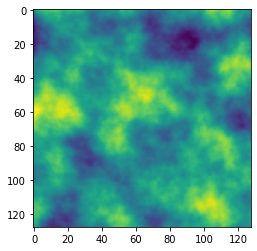

Time taken: 2.624964714050293


In [5]:
generate(128, 1)